In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as patches
import math
from decimal import Decimal
from matplotlib.patches import Circle



#Ver toda a matriz Gk
import sys
np.set_printoptions(
                   edgeitems=10, linewidth=50)


 ### Foward Modeling

In [15]:
# Gz calculus
def gvertical(vecx,R,xq,z1,z2,t):
    gz = np.zeros(len(vecx), dtype=float)
    for i in range(len(gz)):   
            if z1==0:
                
                if xq==0 and vecx[i]==t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+vecx[i]**2)/(vecx[i]**2))-z2*(math.atan(0)-math.atan((vecx[i]/z2))))
                    

                if xq==0 and vecx[i]!=t:
                    gz[i] = (2*G*R)*(((vecx[i])/2)*math.log((z2**2+(vecx[i])**2)/((vecx[i])**2))+((vecx[i]-t)/2)*math.log(((vecx[i]-t)**2)/(z2**2+((vecx[i]-t)**2)))-z2*(math.atan(((vecx[i]-t)/z2))-math.atan((vecx[i]/z2))))
  
                if xq!=0 and vecx[i]==xq:
                    gz[i] = (2*G*R)*(((-t)/2)*math.log((((-t)**2)/(z2**2+(-t)**2)))-z2*(math.atan(((-t)/z2))))

                
                if xq!=0 and vecx[i]!=xq:
                    
                    if vecx[i]-xq==t:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))-z2*(math.atan(0)-math.atan(((vecx[i]-xq)/z2))))

                    
                    else:
                        gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/((vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2))))        

                    

            else:
                 gz[i] = (2*G*R)*(((vecx[i]-xq)/2)*math.log((z2**2+(vecx[i]-xq)**2)/(z1**2+(vecx[i]-xq)**2))+(((vecx[i]-xq)-t)/2)*math.log((z1**2+((vecx[i]-xq)-t)**2)/(z2**2+((vecx[i]-xq)-t)**2))-z2*(math.atan((((vecx[i]-xq)-t)/z2))-math.atan(((vecx[i]-xq)/z2)))+z1*(math.atan((((vecx[i]-xq)-t)/z1))-math.atan(((vecx[i]-xq)/z1))))        


    return gz

In [20]:
# Generate the bouguer anomaly curve
def gv_curve(densities, vecx, xq, z1, z2, t, num_prisms):
    final_curve = np.zeros(len(vecx), dtype=float)
    counter = 0  
    num_layers = len(densities)  # Quantity of layers
    
    for d in densities:
        for i, j in enumerate(d):
            counter += 1
            
            # Calculating which layer to use dynamically
            layer_index = min(counter // (num_prisms // num_layers), num_layers - 1)
            
            # Update the final curve with the vertical gravity calculation for the correct layer
            final_curve += gvertical(vecx, j, xq[i], z1[layer_index], z2[layer_index], t)
                
    return final_curve * (10**5)


### Creating Syntetic Data parameters

In [21]:
# x parameter
vecx=np.arange(100,8000,200)

# x parameter for ploting
vecx_km=[]
for i in vecx:
    vecx_km.append(i/1000)

G= 6.672*(10**(-11 )) # km**3/s**2 * kg**2

# 1G= 10**(-4) kg/A * s**2  -ALREADY IN mGauss

z1=np.arange(0,1000,1000/20)
z2=np.arange(1000/20,1000+1000/20,1000/20) #meters
xq=np.arange(0,8000,200) #meters

t=200



### Gravimetric Validation

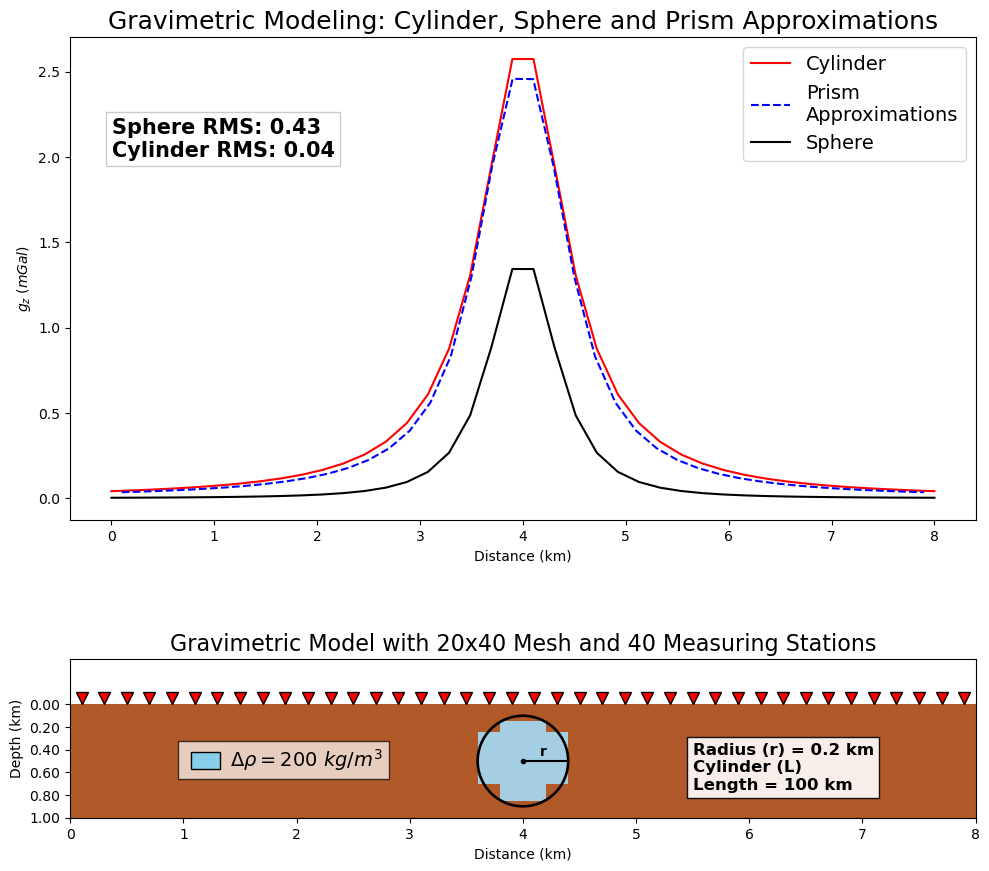

In [26]:
# Gravitational constant (m^3 kg^−1 s^−2)
G = 6.67430e-11

# Sphere parameters
R = 400.0             # Radius of the sphere (m)
delta_rho = 200       # Density contrast (kg/m³)
z = 500.0             # Depth to the center of the sphere (m)
L = 100000            # Length of the cylinder (m)

# Define x-axis values (station positions)
x_min = 0
x_max = 8000
n_points = 40         # Number of stations
x_values = np.linspace(x_min, x_max, n_points)

# Density mesh (20 rows x 40 columns)
densidades_malha = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 200, 200, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]


density_mesh = [
    [0] * 40,
    [0] * 40,
    [0] * 40,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 18 + [200] * 4 + [0] * 18,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 19 + [200, 200] + [0] * 19,
    [0] * 40,
    [0] * 40,
    [0] * 40
]


# --- Gravimetric modeling ---

# Cylinder response
gz_cylinder_raw = ((4.19e-10 * delta_rho * (R**2)) / (z * (1 + ((x_values - 4000)**2) / z**2))) \
                  * (1 / (1 + (((x_values - 4000)**2 + z**2) / L**2))**0.5)
gz_cylinder = gz_cylinder_raw * 1e5  # Convert to mGal

# Sphere response
gz_sphere = ((2.79e-10 * delta_rho * (R**3) * z) / (((x_values - 4000)**2 + z**2)**1.5)) * 1e5  # mGal

# Prism response (you must define vecx, xq, z1, z2, t, and gv_curve)
gz_prisms = gv_curve(density_mesh, vecx, xq, z1, z2, t, 900)

# RMS errors
rms_cylinder = np.sqrt(np.mean((gz_cylinder - np.array(gz_prisms))**2))
rms_sphere = np.sqrt(np.mean((gz_sphere - np.array(gz_prisms))**2))

# --- Plotting ---
plt.figure(figsize=(10, 10))

# Plot 1: Gravimetric curves
plt.subplot(2, 1, 1)
plt.plot(x_values, gz_cylinder, color='red', label='Cylinder')
plt.plot(vecx, gz_prisms, color='blue', label='Prism\nApproximations', linestyle='--')
plt.plot(x_values, gz_sphere, color='black', label='Sphere')

plt.xlabel('Distance (km)')
plt.ylabel(r'$g_z$ $(mGal)$')
plt.title('Gravimetric Modeling: Cylinder, Sphere and Prism Approximations', fontsize=18)
plt.legend(loc='upper right', fontsize=14)

# Custom x-ticks
x_vals = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]
x_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8']
plt.xticks(x_vals, x_labels)

# RMS text
plt.text(3, 2, f'Sphere RMS: {rms_sphere:.2f}\nCylinder RMS: {rms_cylinder:.2f}', 
         fontsize=15, color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.2, edgecolor='black'))

# Plot 2: 2D Model with density contrast
plt.subplot(2, 1, 2)
pastel_reversed = plt.get_cmap('Paired').reversed()
plt.imshow(density_mesh, extent=[0, 8, 1, 0], cmap=pastel_reversed, aspect=1/1)

# Stations (measurement positions)
vecyy = np.zeros_like(vecx_km) - 0.06
plt.plot(vecx_km, vecyy, "v", markersize=8, color='red', markeredgecolor='black')

# Draw sphere
circle1 = plt.Circle((4, 0.5), 0.4, edgecolor='black', facecolor='none', lw=1.9)
plt.gca().add_patch(circle1)

# Labels and limits
plt.xlim((0, 8))
plt.ylim((1.001, -0.4))
y_vals = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
y_labels = ['0.00', '0.20', '0.40', '0.60', '0.80', '1.00']
plt.yticks(y_vals, y_labels)

plt.xlabel('Distance (km)')
plt.ylabel('Depth (km)')
plt.title('Gravimetric Model with 20x40 Mesh and 40 Measuring Stations', fontsize=16)

# Annotations
plt.text(5.5, 0.75, 'Radius (r) = 0.2 km\nCylinder (L)\nLength = 100 km',
         fontsize=12, color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='black'))

# Arrow from sphere center to boundary
plt.plot([4, 4.4], [0.5, 0.5], marker='none', color='black')
plt.plot(4, 0.5, marker='o', color='black', markersize=3)
plt.text(4.15, 0.45, 'r', fontsize=10, color='black', fontweight='bold')

# Density annotation
plt.text(1, 0.55, r'       $\Delta\rho=200\ kg/m^3$', fontsize=14, 
         color='black', fontweight='bold', 
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Add blue rectangle
rectangle = plt.Rectangle((1.07, 0.42), 0.25, 0.15, facecolor='skyblue', 
                          edgecolor='black', linewidth=1, zorder=10)
plt.gca().add_patch(rectangle)

# Final layout
plt.tight_layout()
plt.show()
